In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\PRODIGY INFOTECH\task_4_dataset.csv")
df.head(2)

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...


In [11]:
df.tail(10)

,ID,Topic,Sentiment,Tweet
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [12]:
df.dtypes

ID            int64
Topic        object
Sentiment    object
Tweet        object
dtype: object

In [13]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [14]:
df.info

<bound method DataFrame.info of          ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                   Tweet  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window

**Checking for duplicates and null values**

In [15]:
df.duplicated().sum()

2701

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Tweet        326
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

**Analyze and visualize Sentiment patterns**

In [21]:
sentiment_patterns=df.groupby(['Topic', 'Sentiment']).size().reset_index(name='counts')
sentiment_patterns

,Topic,Sentiment,counts
0,Amazon,Irrelevant,185
1,Amazon,Negative,565
2,Amazon,Neutral,1197
3,Amazon,Positive,302
4,ApexLegends,Irrelevant,185
...,...,...,...
123,Xbox(Xseries),Positive,743
124,johnson&johnson,Irrelevant,192
125,johnson&johnson,Negative,809
126,johnson&johnson,Neutral,1004


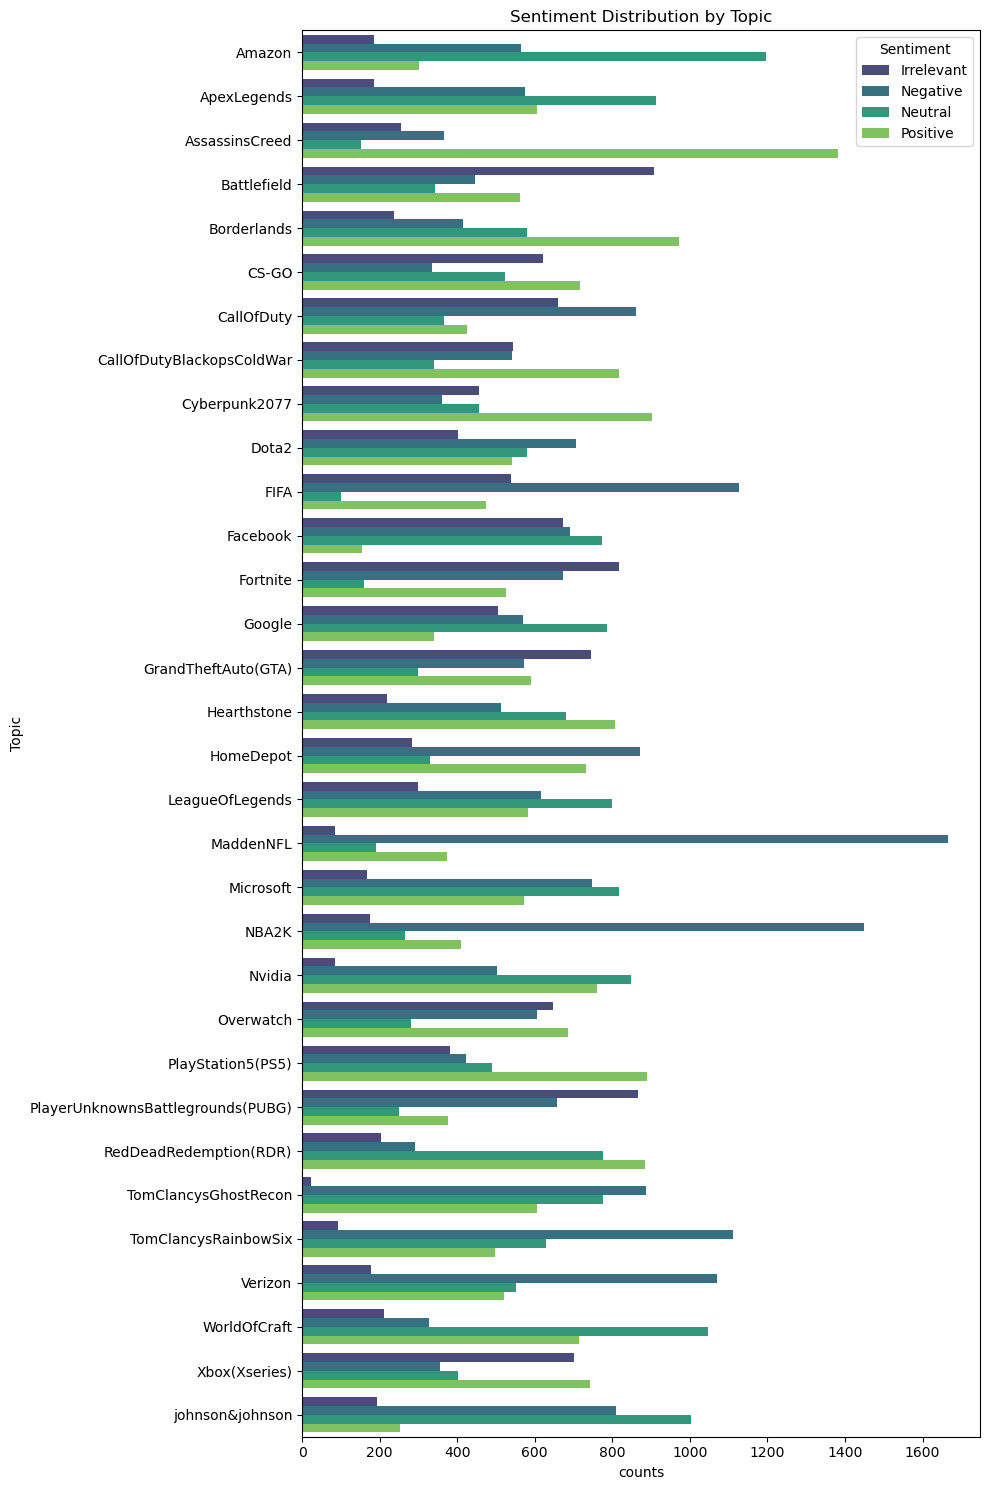

In [24]:
plt.figure(figsize=(10,15))
sns.barplot(y='Topic', x='counts', hue='Sentiment', data=sentiment_patterns,palette='viridis', orient='h')
plt.title('Sentiment Distribution by Topic')
plt.tight_layout()
plt.show()

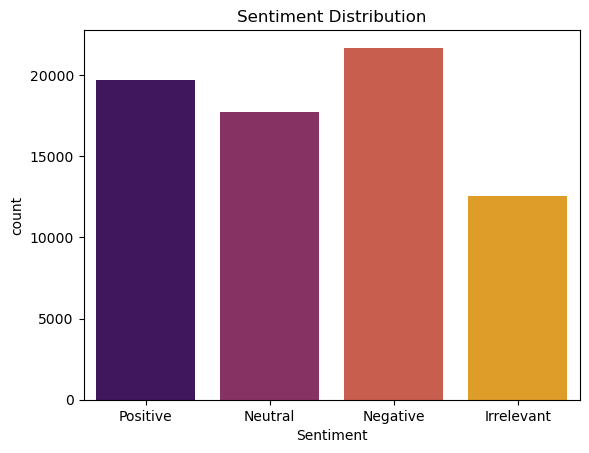

In [25]:
sns.countplot(x='Sentiment',data=df,palette='inferno')
plt.title("Sentiment Distribution")
plt.show()

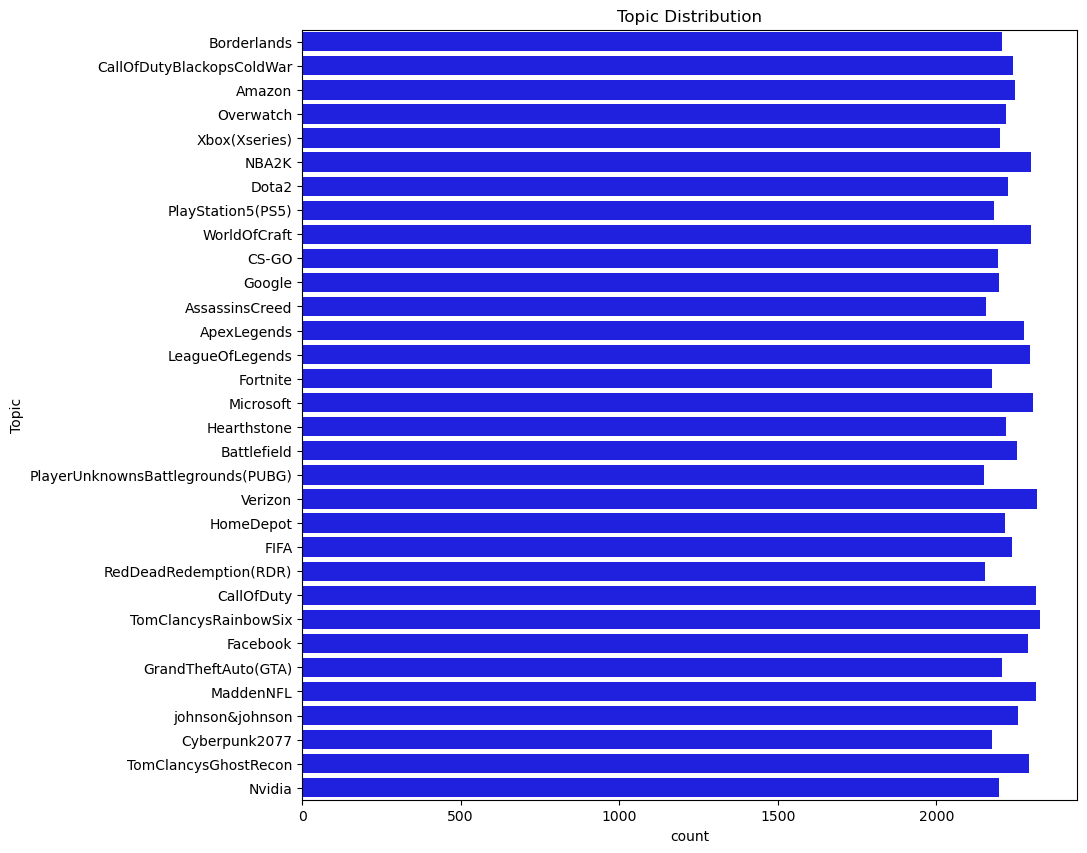

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(y='Topic',data=df,color='b')
plt.title("Topic Distribution")
plt.show()

In [29]:
tc=df['Topic'].value_counts().nlargest(5).index
top= sentiment_patterns[sentiment_patterns['Topic'].isin(tc)]

**Top Five Negative Sentiments Topics**

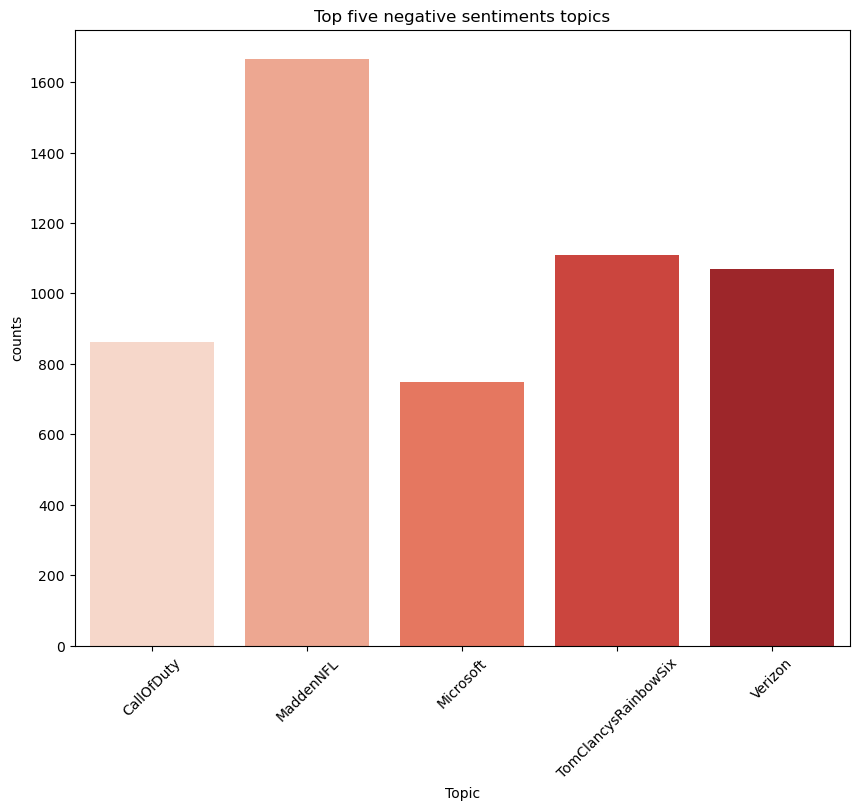

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='Topic',y='counts',data=top[top["Sentiment"]=='Negative'],palette='Reds')
plt.xticks(rotation=45)
plt.title("Top five negative sentiments topics")
plt.show()

**Top Five Positive Sentiments Topics**

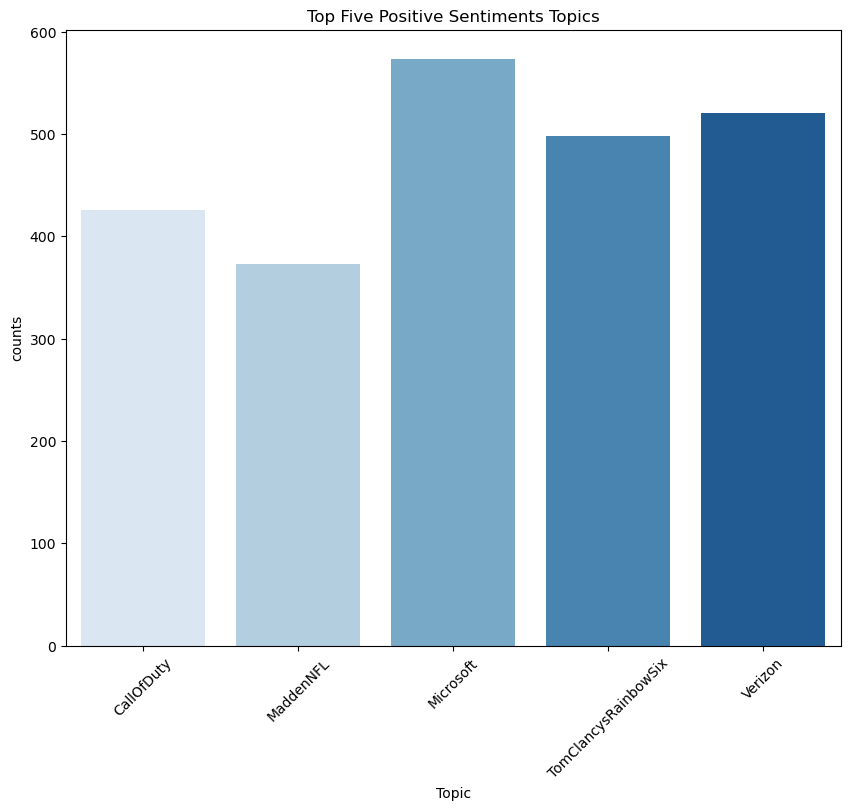

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y='counts',data=top[top["Sentiment"]=='Positive'],palette="Blues")
plt.title("Top Five Positive Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

**Top Five Neutral Sentiments Topics**

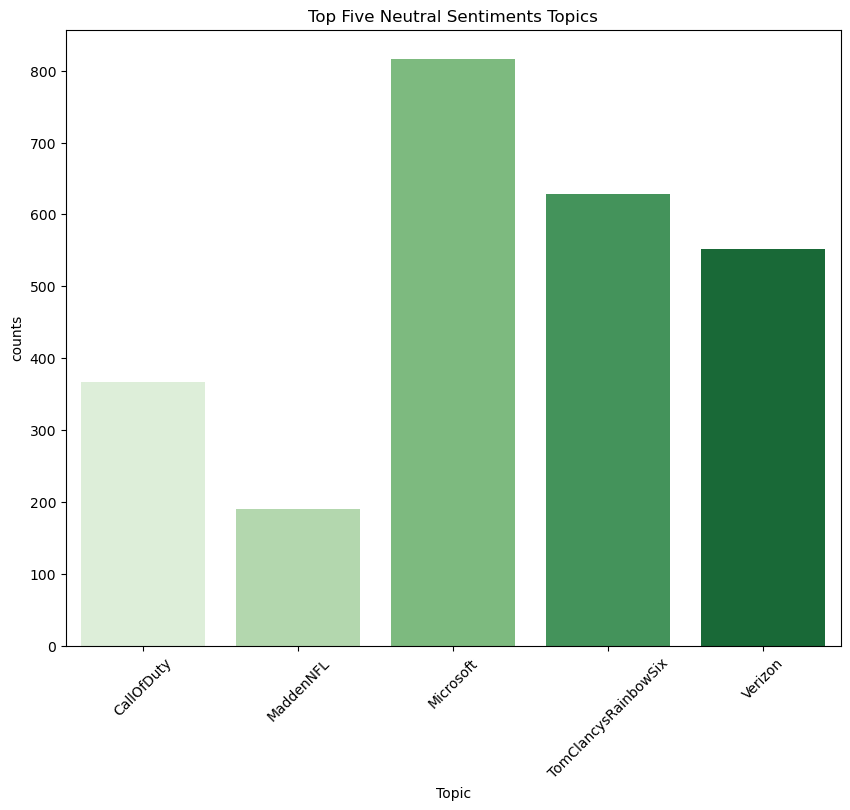

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y="counts",data=top[top["Sentiment"]=="Neutral"],palette='Greens')
plt.title("Top Five Neutral Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

**Top Five Irrelevant Sentiments Topics**

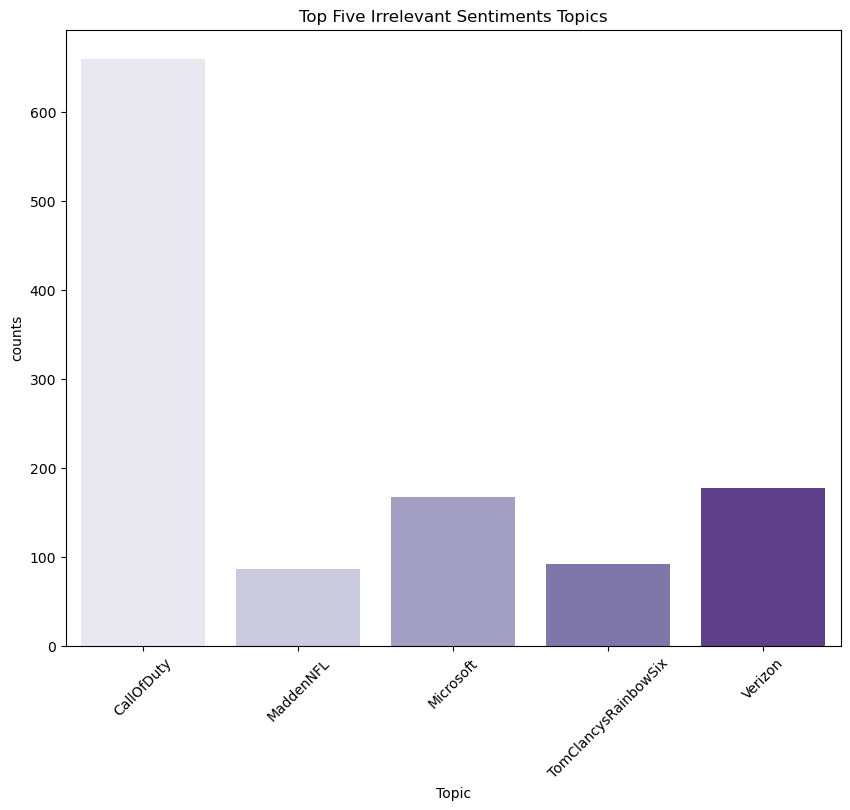

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y="counts",data=top[top["Sentiment"]=="Irrelevant"],palette='Purples')
plt.title("Top Five Irrelevant Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

**Heatmap of Topic vs Sentiment**

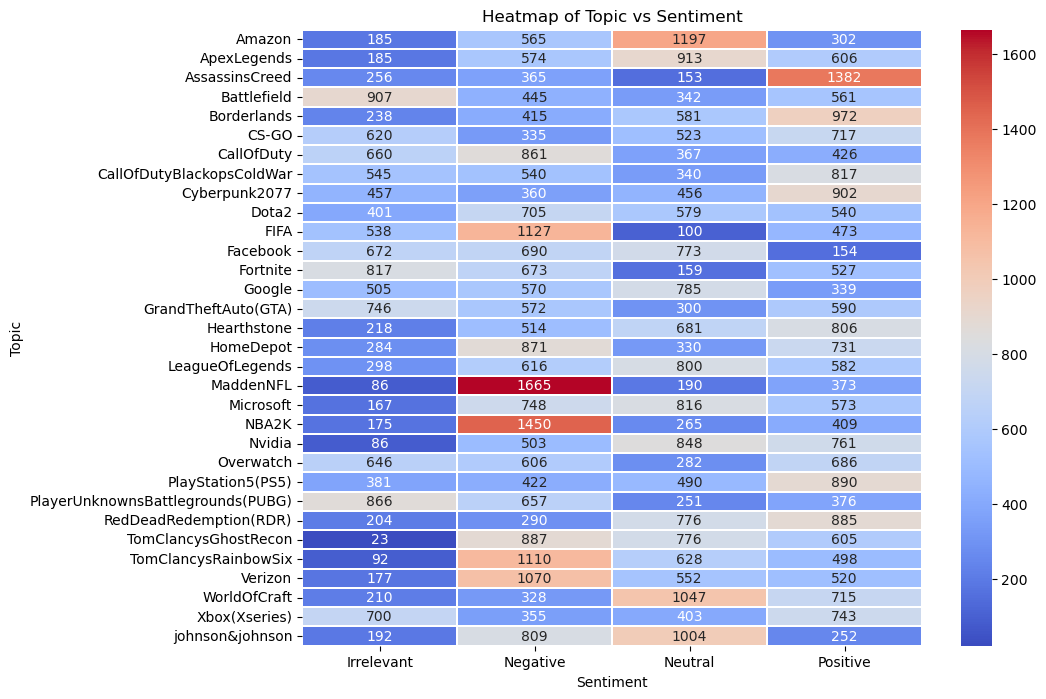

In [34]:
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

plt.figure(figsize=(10,8))
sns.heatmap(crosstab,cmap='coolwarm',annot=True, fmt='d', linewidths=.1)
plt.title('Heatmap of Topic vs Sentiment')
plt.show()

**Word Clouds for Each Sentiment**

In [35]:
pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud

# Generate word clouds
pst_text = ' '.join(df[df['Sentiment'] == 'Positive']['Tweet'])
neg_text = ' '.join(df[df['Sentiment'] == 'Negative']['Tweet'])
neu_text = ' '.join(df[df['Sentiment'] == 'Neutral']['Tweet'])
irr_text = ' '.join(df[df["Sentiment"]== 'Irrelevant']['Tweet'])

In [38]:
wc_pst = WordCloud(width=800, height=400).generate(pst_text)
wc_neg = WordCloud(width=800, height=400).generate(neg_text)
wc_neu = WordCloud(width=800, height=400).generate(neu_text)
wc_irr = WordCloud(width=800, height= 400).generate(irr_text)

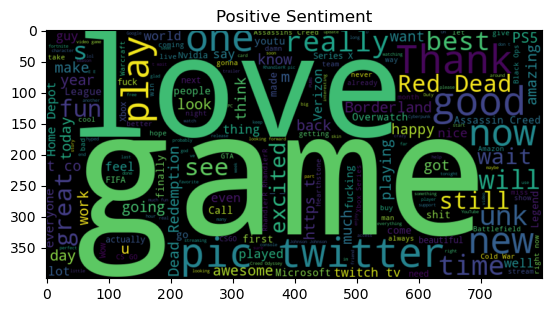

In [39]:
# For positive Sentiment
plt.imshow(wc_pst, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.show()

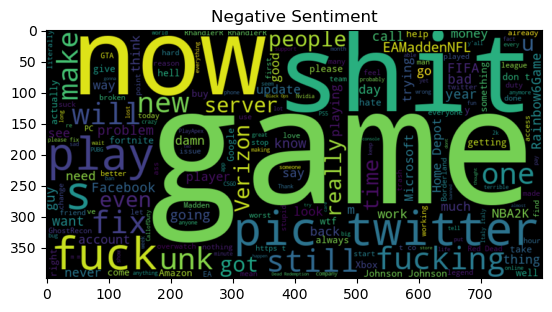

In [40]:
# For negative sentiment
plt.imshow(wc_neg,interpolation='bilinear')
plt.title('Negative Sentiment')
plt.show()

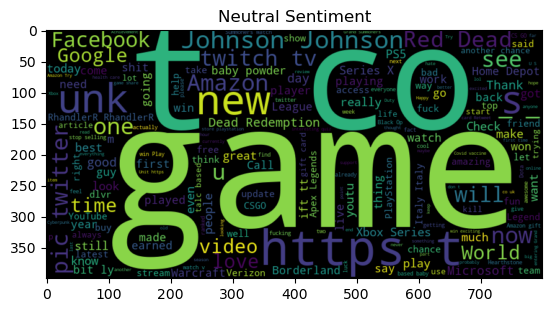

In [41]:
# For neutral sentiment
plt.imshow(wc_neu,interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.show()

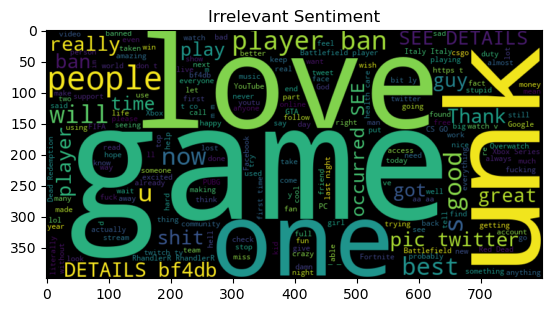

In [42]:
# For Irrelevant Sentiment
plt.imshow(wc_irr,interpolation='bilinear')
plt.title('Irrelevant Sentiment')
plt.show()